In [ ]:
library(hexView)
library(AER)
library(lmtest)
library(ggplot2)
library(car)
library(carData)
library(strucchange)
library(fBasics)

# Bài 6.1

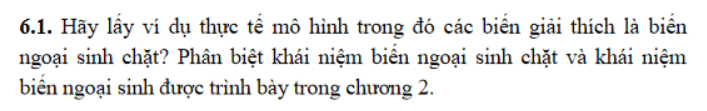

Biến ngoại sinh: X là biến ngoại sinh thì $Cov(X_t,u_t)=0\ \forall t$

Biến ngoại sinh chặt: X là biến ngoại sinh chặt thì $Cov(X_t,u_s)=0\ \forall t,s$

# Bài 6.2

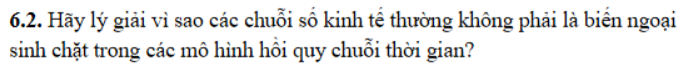

Vì nó vi phạm giả thiết không tương quan với sai số ngẫu nhiên ở thời điểm bất kì

# Bài 6.3

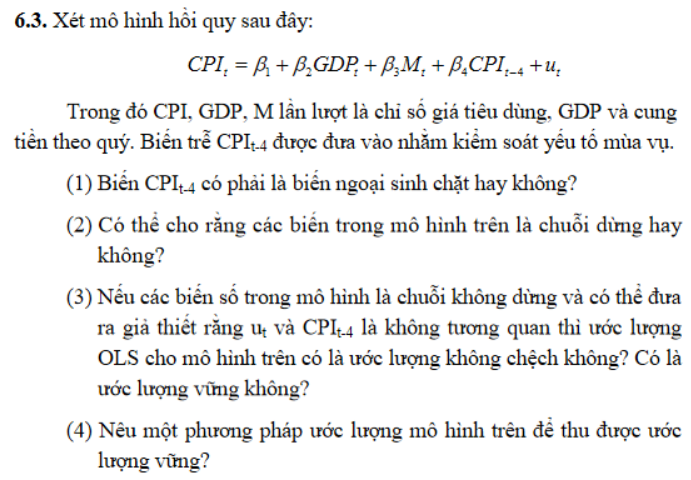

(1) Không vì $Cov(CPI_{t-4},u_{t-4})\not=0$

(2) Không vì GDP tăng dần

(3) Ước lượng vẫn chệch và không vững vì (1)

(4) Lấy sai phân bậc nhất

# Bài 6.4

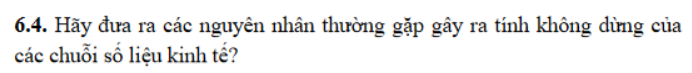

Chuỗi kinh tế có xu hướng tăng

Chuỗi kinh tế biến động mạnh trong thời kỳ bất ổn 

# Bài 6.5

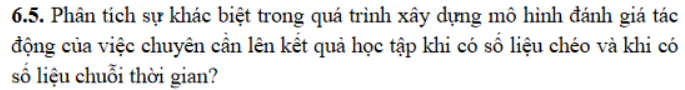

# Bài 6.6

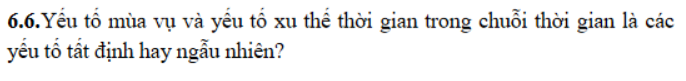

Ngẫu nhiên, 

- Yếu tố mùa vụ chỉ xuất hiện trong các chuỗi có tần suaastt nhỏ hơn 1 năm

- Yếu tố xu thế không xuất hiện ở chuỗi mang tính ổn định (returns,...)

# Bài 6.7

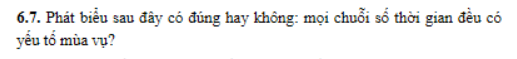

Không, chuỗi thời gian theo năm không có

# Bài 6.8

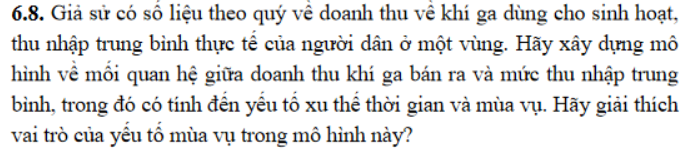

$DT_t=\beta_1+\beta_2ATN_t+\beta_3t+\beta_4D_t+u_t$

# Bài 6.9

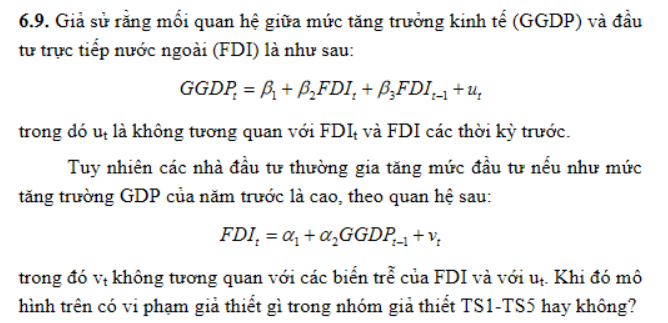

Ta có 
- $GGDP_{t-1}=\beta_1+\beta_2FDI_{t-1}+\beta_3FDI_{t-2}+u_{t-1}
\\
\Rarr FDI_t=\alpha_1+\alpha_2 GGDP_{t-1}+v_t=\alpha_1+\alpha_2 [\beta_1+\beta_2FDI_{t-1}+\beta_3FDI_{t-2}+u_{t-1}]+v_t$

- Vậy $FDI_t$ tương quan với $u_{t-1}$ => Vi phạm TS2

# Bài 6.10

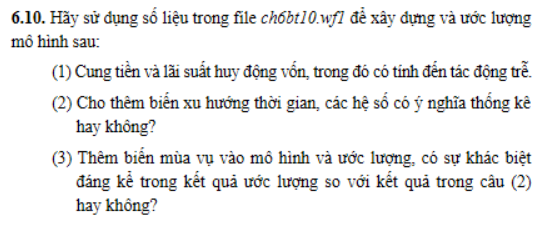

In [9]:
b10 <- readEViews("ch6.bt10.wf1")

Warning message in readEViews("ch6.bt10.wf1"):
"Skipping boilerplate variable
"
Warning message in readEViews("ch6.bt10.wf1"):
"Skipping boilerplate variable
"


# Bài 6.11

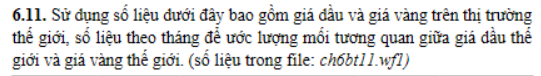

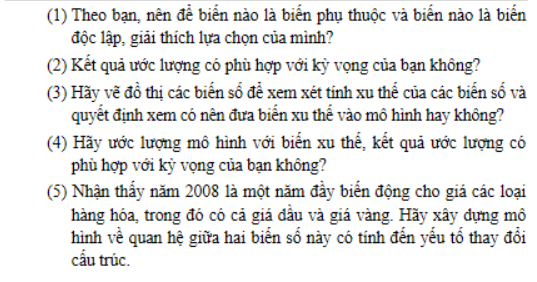

In [11]:
b11 <- readEViews("ch6bt11.wf1")

Warning message in readEViews("ch6bt11.wf1"):
"Skipping boilerplate variable
"
Warning message in readEViews("ch6bt11.wf1"):
"Skipping boilerplate variable
"


In [13]:
names(b11)

[1] "Date"   "P_GOLD" "P_OIL"

(1) Giá vàng

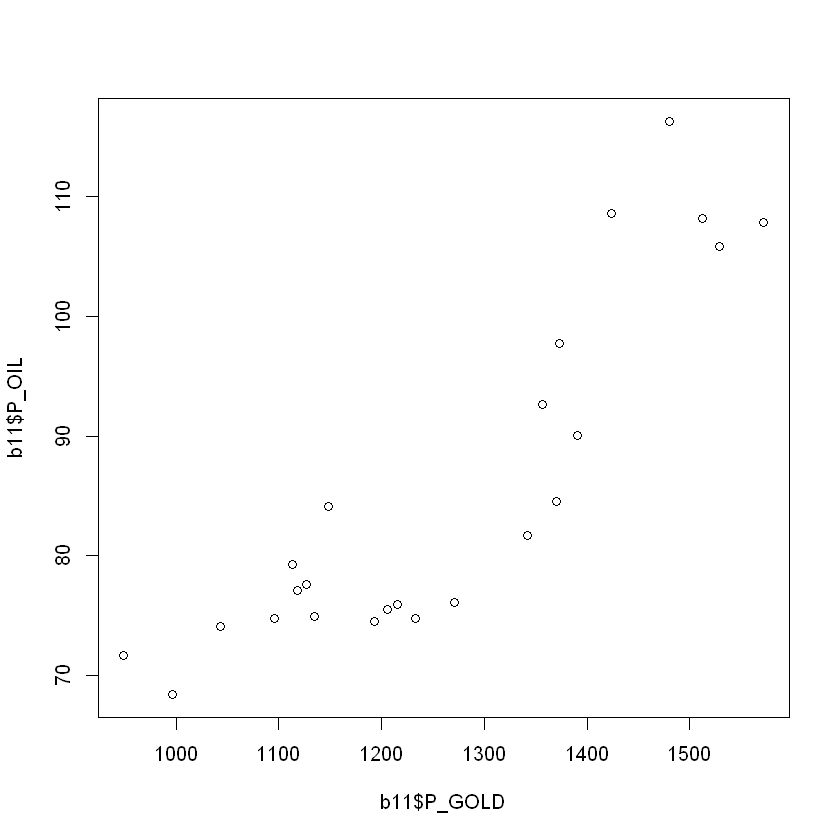

In [14]:
plot(b11$P_GOLD,b11$P_OIL)

# Bài 6.12

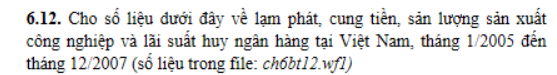
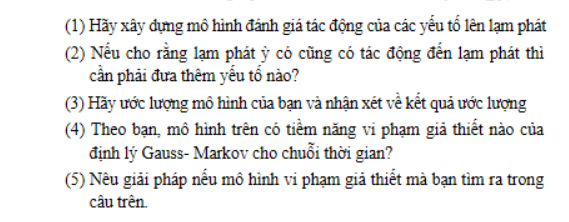

In [42]:
b12 <- readEViews("ch6bt12.wf1")

Warning message in readEViews("ch6bt12.wf1"):
"Skipping boilerplate variable
"
Warning message in readEViews("ch6bt12.wf1"):
"Skipping boilerplate variable
"


In [55]:
b12 <- read.table("da.txt",header=TRUE)

In [57]:
names(b12)

[1] "Thang"   "Lamphat" "M2"      "SLSXCN"  "r"

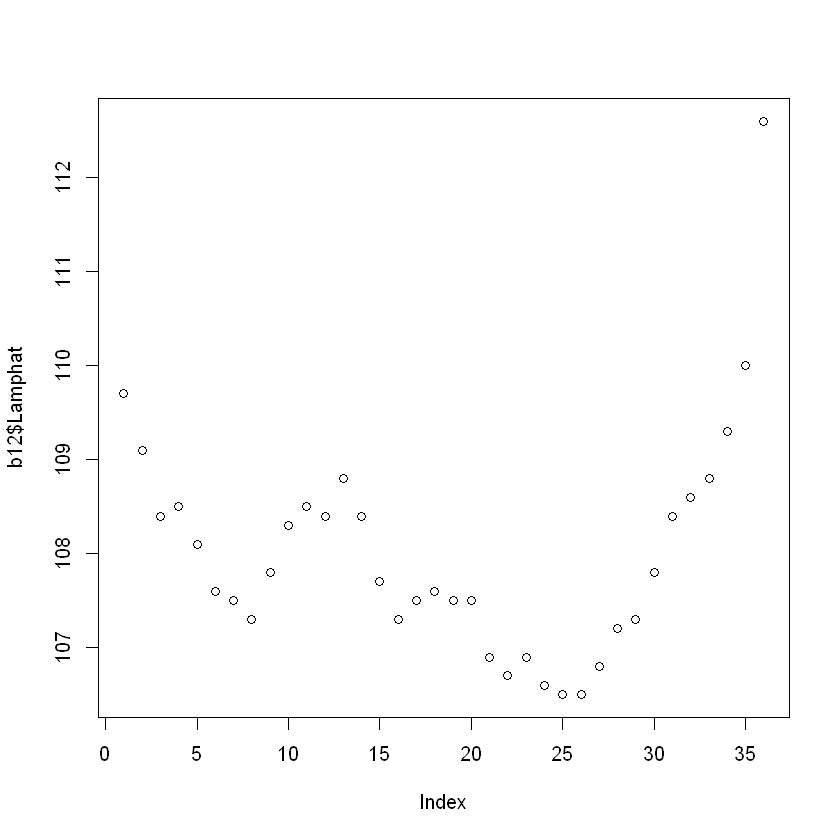

In [58]:
plot(b12$Lamphat)

## (1)

In [34]:
hq <- lm(data = b12, LP~M2+SLSXCN)
summary(hq)


Call:
lm(formula = LP ~ M2 + SLSXCN, data = b12)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3875 -4.9871  0.0603  2.3888 10.8026 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.731e+01  4.287e+00  20.366  < 2e-16 ***
M2          3.428e-07  2.981e-06   0.115    0.909    
SLSXCN      5.421e-04  1.188e-04   4.561  3.9e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.417 on 45 degrees of freedom
Multiple R-squared:  0.4377,	Adjusted R-squared:  0.4127 
F-statistic: 17.51 on 2 and 45 DF,  p-value: 2.372e-06


## (2)

Cần thêm biến trễ của lạm phát vd: $LP_{t-1}$

Trong đó:
Lạm phát ỳ xuất hiện là do lạm phát trong quá khứ ảnh hưởng đến kì vọng về lạm phát trong tương lai và kì vọng này tác động đến tiền lương và giá cả mà mọi ngườI ấn định. 

## (3)

In [24]:
library(dynlm)
hq2 <- dynlm(data = b12, LP~M2+SLSXCN+L(LP,1))
summary(hq2)

Warning message in summary.lm(hq2):
"essentially perfect fit: summary may be unreliable"



Time series regression with "numeric" data:
Start = 1, End = 48

Call:
dynlm(formula = LP ~ M2 + SLSXCN + L(LP, 1), data = b12)

Residuals:
       Min         1Q     Median         3Q        Max 
-6.604e-15 -2.700e-17  1.563e-16  2.514e-16  1.490e-15 

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 3.799e-14  2.703e-15 1.406e+01  < 2e-16 ***
M2          9.439e-22  5.880e-22 1.605e+00    0.116    
SLSXCN      2.338e-19  2.834e-20 8.249e+00 1.78e-10 ***
L(LP, 1)    1.000e+00  2.940e-17 3.401e+16  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.069e-15 on 44 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 6.857e+32 on 3 and 44 DF,  p-value: < 2.2e-16


## (4)

Giả thiết 2: $Cov(u,LP_{t-1})\not=0$

## (5)

Dùng sai phân cấp 1